In [ ]:
import random
import matplotlib.pyplot as plt
import xlrd
import math
import numpy as np

In [ ]:
#Data Extracting Splitting in test and train


loc="weather_data.xlsx"
wb = xlrd.open_workbook(loc)
sheet = wb.sheet_by_index(0)
print(sheet.nrows, sheet.ncols)
data=[]
for i in range(1,sheet.nrows):
  temp=[]
  for j in range(sheet.ncols):
    temp.append(float(sheet.cell_value(i,j)))
  data.append(temp)
data2=data
random.shuffle(data2)
n=len(data)
data_tr=data2[:(70*n)//100]
data_tt=data2[(70*n)//100:]


In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


33.0


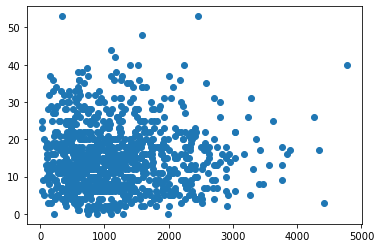

In [ ]:
#playing with data
data=np.array(data)
x=np.arange(0,100,1)
# for i in range(data[0].shape[0]):
print(data.T[0,0])
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
 
# # Creating plot
# i=100
# ax.scatter3D(data.T[0,:i], data.T[1,:i]**2, data.T[-1,:i], color = "green")
# plt.title("simple 3D scatter plot")
 
# # show plot
# plt.show()
plt.scatter(data.T[0]**2+data.T[2]**2,data.T[-1])
# plt.plot(x,()**4)

In [ ]:
#Extraction the Training point and its output in different np arrays
data_tt = np.array(data_tt)
data_tr = np.array(data_tr)
X_tt=data_tt.T[:][:6].T 
y_tt=data_tt.T[:][6:].T
X_tr=data_tr.T[:][:6].T
y_tr=data_tr.T[:][6:].T
X_tr = X_tr / X_tt.max(axis=0)
X_tt = X_tt / X_tt.max(axis=0)

In [ ]:
#given a list of the required terms in the hypothesis, it transforms the data accordingly.
def kernel(data,term_vec):
  aa=np.array(data)
  kernel_data=[]
  dataT=aa.T
  for i in term_vec:
    c=dataT[int(i[0])]
    for j in range(1,len(i)):
      c=c*dataT[int(i[j])]
    kernel_data.append(c)
  return np.array(kernel_data).T

#Brute force method to include all polynomial terms of certain order into the code.
def kernel_gen(parameter,order):
  lis = ['']
  # print("hi")
  for iter in range(order):
    lis_2 = []
    for j in parameter:
      for k in lis:
        lis_2.append(k+j)
    for i in lis_2:
      ss=[]
      ss[:0]=i 
      ss.sort()
      ss="".join(ss)
      if ss not in lis:
        lis.append(ss)
  lis = lis[1:]
  return lis


461


In [ ]:
#appends 1 in the data_training and test data to be used in normal equations method
oo=np.ones((X_tr.shape[0],1))
# print(oo.shape,X_tr.shape)
X_tr1=np.append(X_tr,oo,axis=1)
oo=np.ones((X_tt.shape[0],1))
X_tt1=np.append(X_tt,oo,axis=1)

#normal eqn
def Linear_MSE_model(x,y):
  return np.linalg.pinv(x)@y

#transforms the data according to kernel and return the weight matrix
def model_gen_caller(ker):
  data_new = kernel(X_tr,ker)
  W = Linear_MSE_model(data_new,y_tr)
  return W


#Caller function for normal equation method
def caller(order):
  order+=1
  lis = []
  n = len(X_tr[0])
  for i in range(n-1):
    lis.append(chr(ord('0')+i)) 
  ker = kernel_gen(lis,order)
  W = model_gen_caller(ker)
  test_data = kernel(X_tt1,ker)
  tr_data = kernel(X_tr1,ker)
  loss = 0
  tr_m = ((tr_data@W) - y_tr)
  tt_m = ((test_data@W) - y_tt)
  tr_loss = ((tr_m.T@tr_m)[0][0])/tr_m.shape[0]
  tt_loss = ((tt_m.T@tt_m)[0][0])/tt_m.shape[0]
  R1=comp_R_2(y_tr,(tr_data@W ))
  R2=comp_R_2(y_tt,(test_data@W))
  return tr_loss,tt_loss,R1,R2

# function is called heret o get the results.
lis1=[]
lis2=[]
for i in range(10):
    a,b,c,d=caller(i)
    lis1.append(a)
    lis2.append(b)

#lis 1 and lis2 contains the required values

In [ ]:
plots the results
i=5
plt.plot(np.arange(1,i+1),np.array(lis2)[:i])
plt.plot(np.arange(1,i+1),np.array(lis1)[:i])

In [ ]:
#elastic net regularization is implemented, for l1 or l2 put lambda2=0 lambda1=0 respectively.
def linear_regr_reg_MAE_elasNet_vectorized(X,y,alpha,max_iter,lambda1,lambda2):
  m,n=X.shape
  W=np.array( np.random.uniform(low=0.001,high=1, size=(X[0].shape[0],1)) )
  w_0=0
  W=np.reshape(W,(n,1))
  for xxxxx in range(max_iter):
    Y_p=X.dot(W)+w_0
    # print(W.shape,Y_p.shape)
    Y_p=np.reshape(Y_p,(Y_p.shape[0],1))
    grad_W=np.zeros((n,1))
    grad_w_0=np.sum(np.where(Y_p-y>0,1,-1))/m
    ww=np.where(W>0,lambda1,-lambda1)
    # print(ww.shape)
    XX=np.where(Y_p-y>0,np.abs(X),-np.abs(X))
    
    grad_W=(np.reshape(np.sum(XX,axis=0),(n,1))+ww+2*lambda2*W)/m
    W=W-alpha*grad_W
    w_0=w_0-alpha*grad_w_0
    if abs(grad_w_0) < 0.001:
      break
  return W,w_0

In [ ]:
#MAE testing

#takes kernel vector, lambda1 and lambda2 and returns the required weightmatrix
def model_gen_caller(ker,l1,l2):
  data_new = kernel(X_tr,ker)
  W = linear_regr_reg_MAE_elasNet_vectorized(data_new,y_tr,0.003,100000,l1,l2)
  return W



def caller(order,l1,l2):
  order+=1
  lis = []
  n = len(X_tr[0])
  for i in range(n):
    lis.append(chr(ord('0')+i)) 

  ker = kernel_gen(lis,order)
  W,w0 = model_gen_caller(ker,l1,l2)
  test_data = kernel(X_tt,ker)
  tr_data = kernel(X_tr,ker)
  tr_m = ((tr_data@W +w0) - y_tr)
  tt_m = ((test_data@W+w0) - y_tt)
  tr_loss = np.sum(np.abs(tr_m))/(X_tr.shape[0])
  tt_loss = np.sum(np.abs(tt_m))/(X_tt.shape[0])
  R1=comp_R_2(y_tr,(tr_data@W +w0))
  R2=comp_R_2(y_tt,(test_data@W +w0))
  return tr_loss,tt_loss,R1,R2


# function is called here. run it to get the results.
lis1=[]
lis2=[]
k=6
#arr contains the chosen lambda1/lambda2 values
arr=[0,0.5,1,1.5,2]

#here the fucntion is called to get the results
for i in range(k):
  for j in arr:
    for kk in arr:
      maxa=math.inf
      maxb=math.inf
      maxd=-1
      maxc=-1
      for jj in range(20):
        a,b,c,d=caller(i,j,kk)
        if b<maxb:
          maxb=b
          maxa=a
          maxc=c
          maxd=d
      print(maxa,maxb,maxc,maxd,j,k)
      lis1.append(maxa)
      lis2.append(maxb)

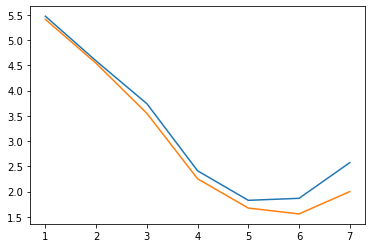

In [ ]:
#plots the graphs
k=6

plt.plot(np.arange(1,k+1),np.array(lis1[:-1]))
plt.plot(np.arange(1,k+1),np.array(lis2[:-1]))

In [ ]:

def linear_regr_MSE_elasnet_vec(X,y,alpha,lambda1,lambda2,max_iter=1000):
    m,n=X.shape
    W=np.array( np.random.uniform(low=0.001,high=1, size=(X[0].shape[0],1)) )
    w_0=0
    # print(y.shape)
    for i in range(max_iter):
        Y_pr=X.dot(W)+w_0
        WW=np.where(W>0,lambda1,-lambda1)
        grad_W=(-2*X.T@(y-Y_pr) +WW+2*lambda2*W)/m
        grad_w_0=-2*np.sum(y-Y_pr)/m
        W=W-alpha*grad_W
        w_0-=alpha*grad_w_0
        if(abs(grad_w_0)<1e-6):
          # print("hi")
          break
    return (W,w_0)


In [ ]:
#MSE testing
import math


#takes kernel vector, lambda1 and lambda2 and returns the required weightmatrix, 
def model_gen_callers(ker,l1,l2):
  data_new = kernel(X_tr,ker)
  W,w0 =  linear_regr_MSE_elasnet_vec(data_new,y_tr,0.007,l1,l2,100000)
  return W,w0



def callers(order,l1,l2):
  order+=1
  lis = []
  n = len(X_tr[0])
  for i in range(n):
    lis.append(chr(ord('0')+i))
  ker = kernel_gen(lis,order)
  W,w0 = model_gen_callers(ker,l1,l2)
  test_data = kernel(X_tt,ker)
  tr_data = kernel(X_tr,ker)
  tr_m = ((tr_data@W +w0) - y_tr)
  tt_m = ((test_data@W+w0) - y_tt)
  tr_loss = (np.sum(tr_m**2))/tr_data.shape[0]
  tt_loss = (np.sum(tt_m**2))/test_data.shape[0]
  R1=comp_R_2(y_tr,(tr_data@W +w0))
  R2=comp_R_2(y_tt,(test_data@W +w0))
  return tr_loss,tt_loss,R1,R2
lis1=[]
lis2=[]
k=6
arr=[0,0.5,1,1.5,2]

#check_iter is named t
t=3
# function is called here. run it to get the results.
for i in range(k):
  
  for j in arr:
    for kk in arr:
      maxa=-1
      maxb=-1
      maxd=-1
      maxc=-1
      for jj in range(t):
        a,b,c,d=callers(i,j,kk)
        #compare on the basis of test R2 results
        if d>maxd:
          maxb=b
          maxa=a
          maxc=c
          maxd=d
      print(maxa,maxb,maxc,maxd,j,k)
      lis1.append(maxa)
      lis2.append(maxb)

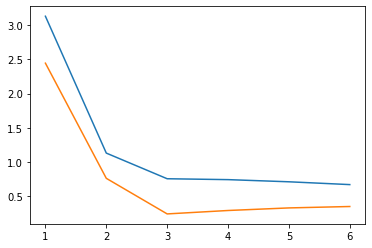

In [ ]:
k=6
plt.plot(np.arange(1,k+1),np.array(lis1[:k]))
plt.plot(np.arange(1,k+1),np.array(lis2[:k]))

In [ ]:
def comp_R_2(y,Y_pr):
  RSS=np.sum((Y_pr-y)**2)/y.shape[0]
  y_=np.mean(y)
  TSS=np.sum((y_-y)**2)/y.shape[0]
  return 1- RSS/TSS